In [2]:
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns

data = pd.read_csv('Combined_GCDetections.csv')

# number of each species detected

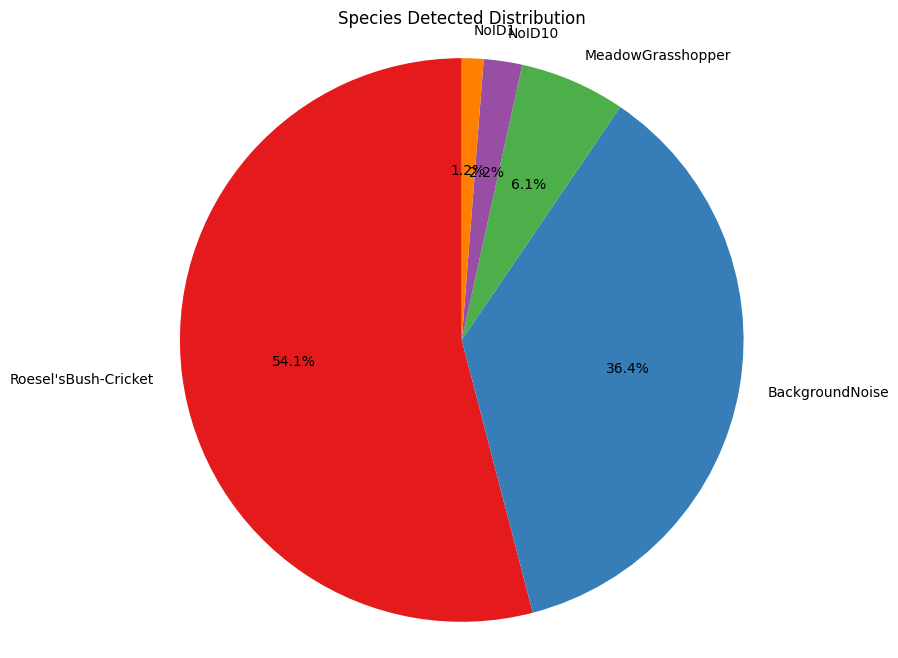

In [ ]:
# Exclude the "background noise" class
filtered_data = data[data['Species'] != 'BackgroundNoise']

# Count occurrences of each species
species_counts = filtered_data['Species'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)

plt.title('Species Detected Distribution')
plt.axis('equal') 

plt.show()

## species by location

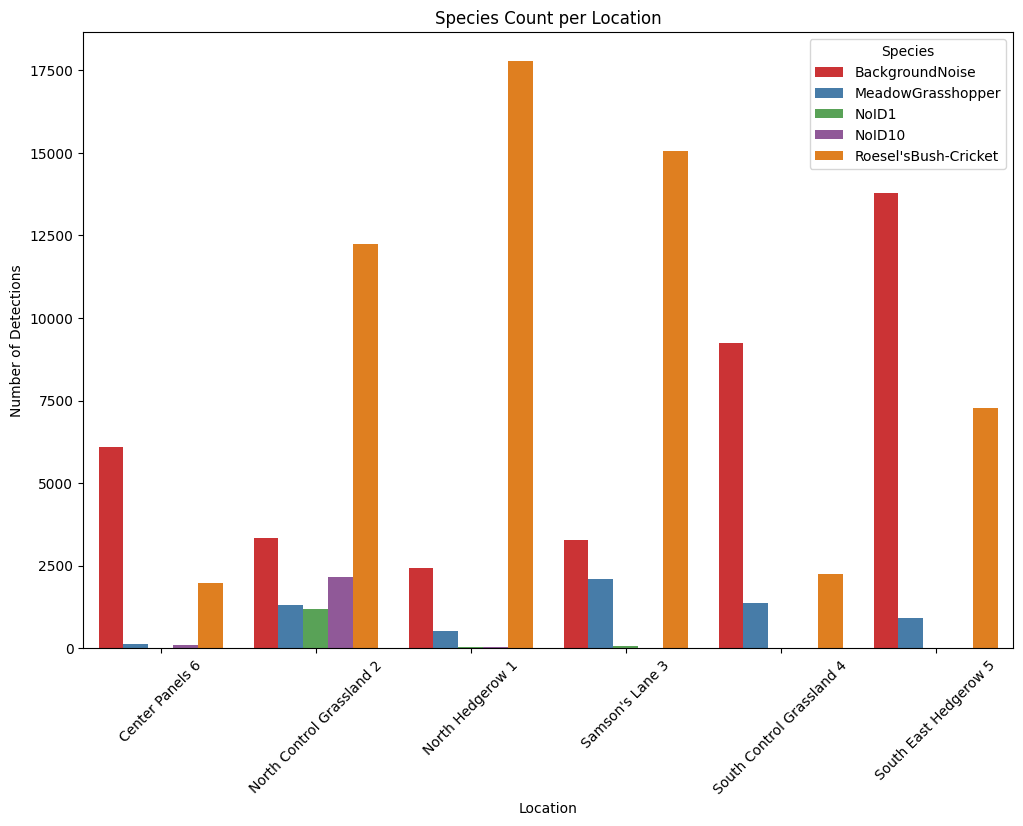

In [ ]:
# Exclude the "BackgroundNoise" class
filtered_data = data[data['Species'] != 'BackgroundNoise']

# Count detections per species and location
species_location_counts = filtered_data.groupby(['Location', 'Species']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=species_location_counts, x='Location', y='Count', hue='Species', palette='Set1')

# Customize the plot
plt.title('Species Count per Location')
plt.xlabel('Location')
plt.ylabel('Number of Detections')
plt.xticks(rotation=45)
plt.legend(title='Species')

# Show the plot
plt.show()

## number of detections per day

C:\Users\Student\AppData\Local\Temp\ipykernel_11420\2750303837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Date'].astype(str) + filtered_data['Time'].astype(str), format='%Y%m%d%H%M%S')
C:\Users\Student\AppData\Local\Temp\ipykernel_11420\2750303837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['Timestamp'].dt.date


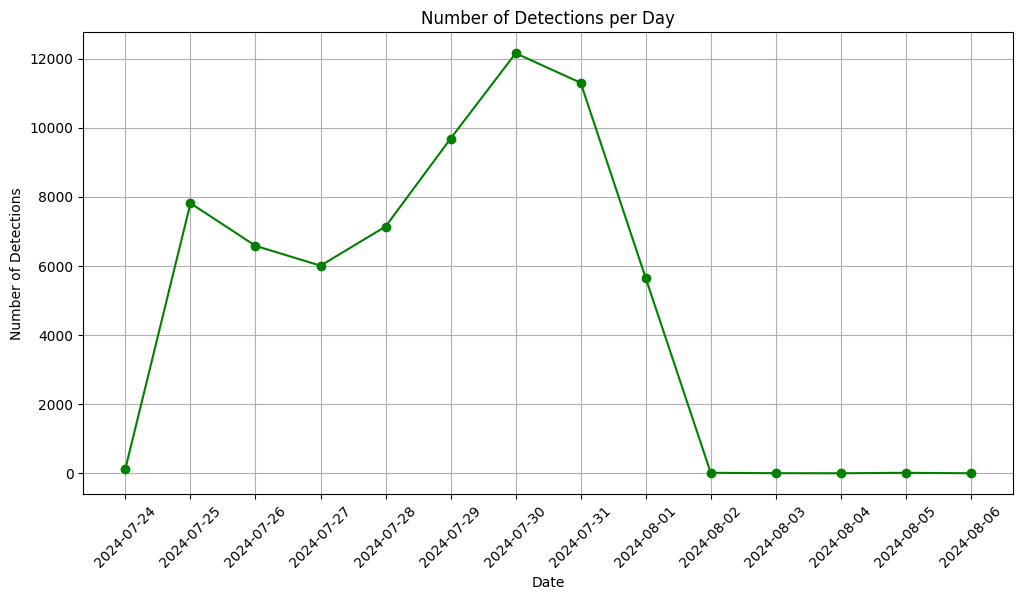

In [12]:
# Exclude the "BackgroundNoise" class
filtered_data = data[data['Species'] != 'BackgroundNoise']

# Convert timestamp columns to datetime
filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Date'].astype(str) + filtered_data['Time'].astype(str), format='%Y%m%d%H%M%S')

# Extract the date for daily analysis
filtered_data['Date'] = filtered_data['Timestamp'].dt.date

# Count detections per day
daily_counts = filtered_data.groupby('Date').size().reset_index(name='Count')

# Ensure all dates in range are included
daily_counts['Date'] = pd.to_datetime(daily_counts['Date'])
date_range = pd.date_range(start=daily_counts['Date'].min(), end=daily_counts['Date'].max())
daily_counts = daily_counts.set_index('Date').reindex(date_range, fill_value=0).reset_index()
daily_counts.rename(columns={'index': 'Date'}, inplace=True)

# Create time-series plot for daily data
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['Date'], daily_counts['Count'], marker='o', linestyle='-', color='g')

# Set x-axis with all dates for better visibility
plt.xticks(ticks=pd.date_range(start=daily_counts['Date'].min(), 
                               end=daily_counts['Date'].max(), 
                               freq='D'), 
           rotation=45)

# Customize the plot
plt.title('Number of Detections per Day')
plt.xlabel('Date')
plt.ylabel('Number of Detections')
plt.grid(True)

# Show the plot
plt.show()

## species and hour of the day

C:\Users\Student\AppData\Local\Temp\ipykernel_11420\3361295081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = filtered_data['Time'].astype(str).str[:2].astype(int)


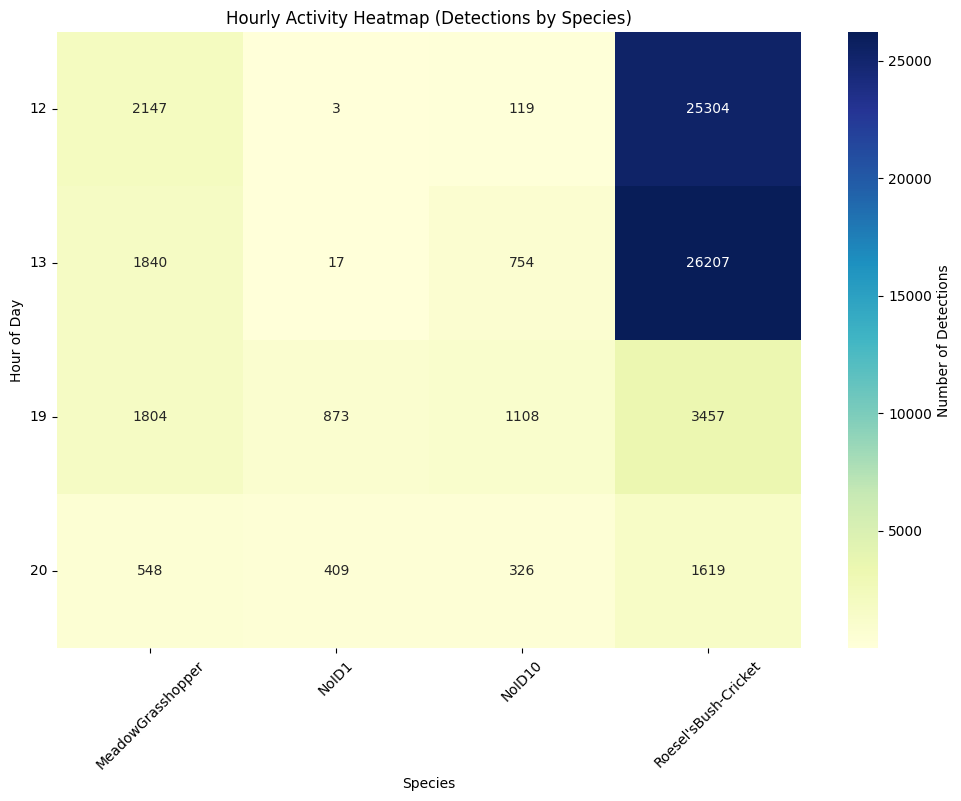

In [7]:
# Exclude the "BackgroundNoise" class
filtered_data = data[data['Species'] != 'BackgroundNoise']

# Extract the hour from the 'Time' column
filtered_data['Hour'] = filtered_data['Time'].astype(str).str[:2].astype(int)

# Group by hour and species, then reshape for heatmap
hourly_activity = filtered_data.groupby(['Hour', 'Species']).size().unstack(fill_value=0)

# Create a heatmap of hourly activity
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_activity, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Number of Detections'})

# Customize the plot
plt.title('Hourly Activity Heatmap (Detections by Species)')
plt.xlabel('Species')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)   

# Show the plot
plt.show()

## number of each species per day

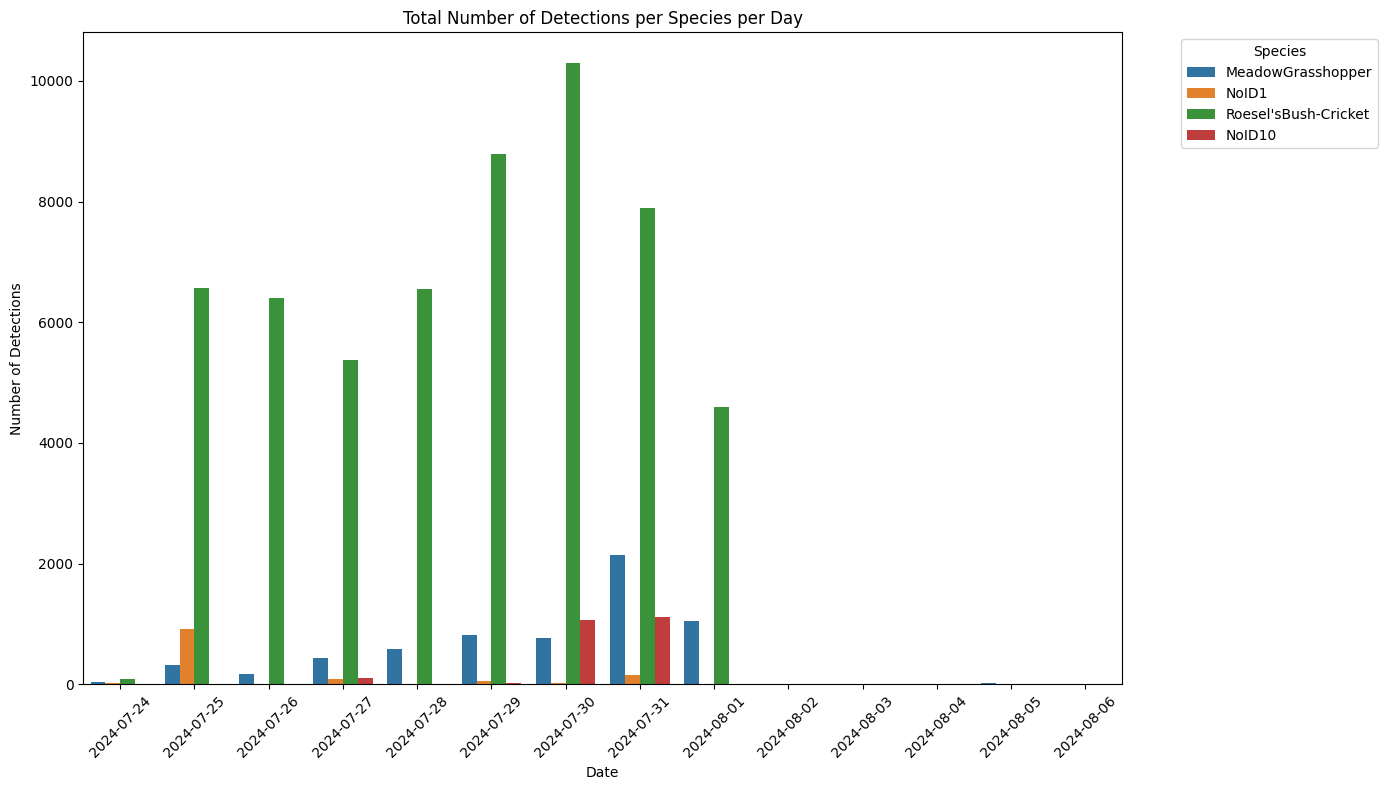

In [2]:
# Ensure 'Date' is a string before conversion
data['Date'] = data['Date'].astype(str)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')

# Check if there are any NaT values after conversion
if data['Date'].isna().sum() > 0:
    print("Warning: Some date values could not be converted. Check the format!")

# Exclude 'BackgroundNoise' from the dataset
data_filtered = data[data['Species'] != 'BackgroundNoise']

# Group the data by 'Date' and 'Species' and count the number of detections
species_per_day = data_filtered.groupby(['Date', 'Species']).size().reset_index(name='Count')

# Convert 'Date' to string for categorical x-axis plotting
species_per_day['Date'] = species_per_day['Date'].dt.strftime('%Y-%m-%d')

# Create a plot showing the total number of detections per species per day
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=species_per_day, x='Date', y='Count', hue='Species')

# Customize the plot
plt.title('Total Number of Detections per Species per Day')
plt.xlabel('Date')
plt.ylabel('Number of Detections')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()